```
Name - Andrea Fox
Date - July 12, 2020
Class - DSC550-T301
Assignment - Week 6 Exercises - Classification
```

# 1 - Decision Trees

```
The goal of this part is to write a script to compute the decision tree for an input dataset. You can assume that all attributes are numeric, except for the last attribute which is the class.

You should use the Information Gain based on Entropy for computing the best split value for each attribute. For the stopping criteria at a node, stop if the purity is at least 95% or stop if the node size is five or lower.

Note that the best way to implement the splits for numeric attributes is to sort the values of that attribute from smallest to largest. Then you can use the mid-point between two distinct (consecutive) values as the split test of the form A≤v. You can then update the class frequencies on both sides of the split and compute the split entropy for each decision. After comparing with the entropy for the node, you can find the best split for the current attribute. Now repeat the whole process for each numeric attribute at that node, and choose the best split over all attributes. Finally, split the data according to the best split, and repeat the whole method recursively, until the stopping conditions are met.

The decision tree should be printed in the following format:

Decision: Car <= 1.5 , Gain= 0.4591479

Decision: Age <= 22.5 , Gain= 0.9182958

Leaf: label= H purity= 1 size= 1

Leaf: label= L purity= 1 size= 2

Leaf: label= H purity= 1 size= 3

Note that each internal node, print the decision followed by the Information Gain, and for each leaf, print the majority label, purity of the leaf, and the size. The indentation indicates the tree level. All nodes at the same level of indentation (tabs) are at the same level in the tree. For the tree above, Car<=1.5 is the root decision. Its left child is Age<=22.5, and its right child is a leaf. Also, for Age≤22.5 its left and right children appear immediately below it.

You may test your program on the iris.txt dataset.
```

In [74]:
"""
Reference: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
Sam helped with the math getting entropy
"""

#Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import math
import sys
import traceback

#Function to find information gain based on entropy
def compute_info_gain(entropies, values, nodes):
    p1 = values[nodes[1]].sum()/values[nodes[0]].sum()
    p2 = values[nodes[2]].sum()/values[nodes[0]].sum()
    entropy_split = p1*entropies[nodes[1]] + p1*entropies[nodes[2]]
    information_gain = entropies[nodes[0]] - entropy_split
    
    return information_gain

#Function to return entropy for each node along with values by class for each node
def get_entropies(tree_values):
    node_splits = tree.tree_.value
    entropies = []
    values = []
    for node in node_splits:
        entropy = 0
        values.append(node[0])
        for classification in node[0]:
            proportion = classification/node.sum()
            if proportion != 0:
                entropy += (-1)*(proportion*math.log(proportion, 2))
        entropies.append(entropy)
    return entropies, values

#Load in dataset to use
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns = ['Species'])

#Fitting the DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 5, min_impurity_decrease = 0.09)
tree.fit(X, y)

# Using those arrays, we can parse the tree structure:
n_nodes = tree.tree_.node_count
children_left = tree.tree_.children_left
children_right = tree.tree_.children_right
feature = tree.tree_.feature
threshold = tree.tree_.threshold

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True
        
entropies, values = get_entropies(tree.tree_.value)

numclass = tree.tree_.n_classes[0]
class_names = iris.target_names
node_labels = []
for node in tree.tree_.value:
    label_i = tree.classes_[np.argmax(node)]
    label_name = class_names[label_i]
    node_labels.append(label_name)
    
#Main function to print out the tree    
def main():
    try:
        print("The tree structure has %s nodes and has the following tree structure: \n" % n_nodes)
        for i in range(n_nodes):
            if is_leaves[i]:
                print("%sLeaf: Label = %s Purity = %s Size = %s"
                     % (node_depth[i] * "\t",
                       node_labels[i],
                       (1-tree.tree_.impurity[i]), 
                       tree.tree_.n_node_samples[i]))
            else:
                nodes = [i, i+1, i+2]
                information_gain = compute_info_gain(entropies, values, nodes)
                print("%sDecision: %s <= %s Gain = %s"
                     % (node_depth[i] * "\t",
                       X.columns[feature[i]],
                       threshold[i],
                       information_gain
                       ))
    #Exception built in case of error            
    except Exception as exception:
        print('exception')
        # print the traceback of the exception
        traceback.print_exc()
        # list name of exception and any arguments
        print('An exception of type {0} occurred.'.format(type(exception).__name__, exception.args));
        
main()
#Stopped here as I met one of the requirements of 5 nodes or less

The tree structure has 5 nodes and has the following tree structure: 

Decision: petal width (cm) <= 0.800000011920929 Gain = 1.2516291673878228
	Leaf: Label = setosa Purity = 1.0 Size = 50
	Decision: petal width (cm) <= 1.75 Gain = 0.6780726131133057
		Leaf: Label = versicolor Purity = 0.5549351429491614 Size = 54
		Leaf: Label = virginica Purity = 0.8489030294828863 Size = 46


# 2 - Support Vector Machines

```
Your goal is to learn a SVM in the traditional dual formulation for the iris-slwc.txt dataset. This is a simple 2D dataset, consisting of 2 dimensions (the sepal length and width), and the third column is the class (+1,-1). One of the class corresponds to iris-setosa, and the other class to other types of irises.

Implement the stochastic gradient ascent algorithm 21.1 in chapter 21, with three different kernels, namely, the linear kernel, the inhomogeneous quadratic kernel, and the homogeneous quadratic kernel. Use ϵ=0.0001 and C=10, and hinge loss.

At the end, print all values of non-zero αi, i.e., for the support vectors, in the following format:

i,αi, one per line.

You should also print the number of support vectors.

Do this for both the kernels. The results on the linear kernel should approximately match the hyperplane h10 in example 21.7.

To check when the quadratic kernel is useful. You may try the quadratic kernel on the iris-PC.txt data. The results should match those given in Example 21.8.
```

In [170]:
"""
Reference:https://github.com/dianejdan/SVM-Gradient-Ascent/blob/master/svm-gradient-ascent.py
Torrey walked through this on Tuesday call. Let us know that original was missing one of the kernels, remove loc, diag
need np. in front of it to work correctly.
"""
#Import libraries
import sys
import pandas as pd
import numpy as np
import numpy.linalg as la

#Read in iris-slwc
df = pd.read_csv('iris-slwc.txt', header = None)
myData = np.genfromtxt('iris-slwc.txt', delimiter = ',')

#sample size
n = myData.shape[0]
n

150

In [171]:
#Change last column to all 1's
X = myData.copy()
X[:,-1] = 1
C = 10 #Moved up from reference code to use in K

#Function to build kerlnel for hinge loss
def kernel_matrix(x, typ, C):
    K_ = np.zeros(shape=(x.shape[0], x.shape[0]))
    
    #Linear Kernel
    if typ == 'linear':
        for i in range(x.shape[0]):
            for j in range(x.shape[0]):
                K_[i,j] = np.dot(x[i,], x[j,])
                
    #Homogeneous Kernel
    elif typ == 'homogeneous':
        for i in range(x.shape[0]):
            for j in range(x.shape[0]):
                K_[i,j] = np.square(np.dot(x[i,], x[j,]))
    
    #Inhomogeneous Kernel
    elif typ == 'inhomogeneous': 
        for i in range(x.shape[0]):
            for j in range(x.shape[0]):
                K_[i,j] = np.square(C + np.dot(x[i,], x[j,]))
    return K_

K = kernel_matrix(X, 'linear', C)

#Calculate step size
eta = 1/np.diag(K)

t = 0

#Initial alphas
alpha = np.zeros(n)

#Difference
diff = 1
eps = 0.0001

while (diff > eps):
    alpha0 = alpha.copy()
    for k in range(n):
        alpha[k] = alpha[k] + eta[k]*(1-myData[k,2]*sum(alpha*myData[:,2]*K[:,k]))
        if alpha[k] < 0:
            alpha[k] = 0
        if alpha[k] > C:
            alpha[k] = C
    t = t+1
    diff = np.sum([la.norm(alpha-alpha0)])
    
#Printing out information
print('Support vectors\n')
for k in range(n):
    if alpha[k] != 0:
        print('Sample {} : {}, {}; Class : {}; A : {}\n'.format(k+1, myData[k,0], myData[k,1], myData[k,2], alpha[k]))

print('Total Number of Support Vectors : {}\n'.format(sum(alpha!=0)))

Support vectors

Sample 25 : 4.9, 2.5; Class : 1.0; A : 9.178461657479335

Sample 55 : 5.4, 3.4; Class : -1.0; A : 2.2640815245195807

Sample 66 : 5.4, 3.0; Class : 1.0; A : 10.0

Sample 107 : 4.9, 3.0; Class : -1.0; A : 10.0

Sample 109 : 4.5, 2.3; Class : -1.0; A : 10.0

Sample 122 : 5.0, 3.0; Class : -1.0; A : 10.0

Sample 138 : 6.0, 3.4; Class : 1.0; A : 10.0

Sample 146 : 5.4, 3.4; Class : -1.0; A : 2.724996110297604e-15

Total Number of Support Vectors : 8



In [ ]:
#For the second part of this question it sounded like it wasn't a must, so hopefully I didn't make a mistake reading it like that

# 3 - Complete the Following Exercises in Your Text:

### Mining of Massive Datasets - Page 462 --- Exercise 12.2.1: (c), (d)
```
Modify the training set of Fig.12.6 so that example b also includes the word "nigeria" (yet remains a negative example - perhaps someone telling about their trip to Nigeria). Find a weight vector that separates the positive and negative exmaples using:
```

In [18]:
#Import libraries
import numpy as np
import pandas as pd

#Creating dict to hold values from Figure 12.6
train = {'and': [1,0,0,1,1,1], 
         'viagra': [1,0,1,0,0,0], 
         'the': [0,1,1,0,1,1], 
         'of': [1,1,0,1,0,1], 
         'nigeria': [1,0,0,0,1,0],
        'y': [1,-1,1,-1,1,-1]}

#Creating dataframe
spam = pd.DataFrame(train, index = ['a', 'b', 'c', 'd', 'e', 'f'])
spam

,and,viagra,the,of,nigeria,y
a,1,1,0,1,1,1
b,0,0,1,1,0,-1
c,0,1,1,0,0,1
d,1,0,0,1,0,-1
e,1,0,1,0,1,1
f,1,0,1,1,0,-1


* (c) - The basic method with a variable threshold, as suggested in Section 12.2.4

In [19]:
"""
Reference: Pg 451  from book and got some help from Sam
"""
#weights
w = np.array([0 for x in range(5)])

#learn rate
n = 0.5

#Calculate
for index, row in spam.iterrows():
    #training vector
    x = np.array(row[:-1])
    #training classification
    y = row[-1]
    wx = np.dot(x, w)
    sign = ((wx > 0) == (y > 0))
    if (sign == False) or (wx ==0):
        #Update weights
        w = w + n*y*x
    print('Row {} Weights: {}'.format(index, w))

Row a Weights: [0.5 0.5 0.  0.5 0.5]
Row b Weights: [ 0.5  0.5 -0.5  0.   0.5]
Row c Weights: [0.5 1.  0.  0.  0.5]
Row d Weights: [ 0.   1.   0.  -0.5  0.5]
Row e Weights: [ 0.   1.   0.  -0.5  0.5]
Row f Weights: [ 0.   1.   0.  -0.5  0.5]


* (d) - The Winnow method with a variable thershold, as suggested in Section 12.2.4

In [22]:
"""
Reference: Pg 455 from the book as well as some explanations/help from Sam and Rachel
"""
#weight
w = np.array([1 for x in range(6)], dtype = 'f')
converged = False

#Tracking number of steps
steps = 0

#How much to raise threshold
raise_fact = 2
#How much to lower threshold
lower_fast = 0.5

while converged == False:
    for index, row in spam.iterrows():
        #training vector
        x = np.array(row[:-1])
        #training classification
        y = row[-1]
        wx = np.dot(x, w)
        if (wx <= 0) and (y > 0):
            w[-1] = w[-1]*lower_fact #update threshold
            for i in range(len(x)-1):
                if x[i] == 1:
                    w[i] = raise_fact*w[i] #update weight
        elif (wx >= 0) and (y < 0):
            w[-1] = w[-1]*raise_fact #update threshold
            for i in range(len(x)-1):
                if x[i]==1:
                    w[i] = w[i]*lower_fact #update weight
                    
        steps +=1
        #Checking whether it converged or not
        converged = check_convergence(spam, w)
        if converged == True:
            break
        if steps == 1000:
            break
    if steps == 1000:
        print('Did not converge')
        break
        
#Print out the steps and weights
print('Steps: {} Weights: {}'.format(steps, w))

#Cannot seem to get the correct output. I've tried looking into some other resources, but wasn't able to figure it out

ValueError: shapes (5,) and (6,) not aligned: 5 (dim 0) != 6 (dim 0)

### Mining of Massive Datasets - Page 473 --- Exercise 12.3.2: (a)

```
The following training set obeys the rule that the positive examples all have vectors whose components sum to 10 or more, while the sum is less than 10 for the negative examples:
([3,4,5], +1)
([1,2,3], -1)
([2,7,2], +1)
([3,3,2], -1)
([5,5,5], +1)
([2,4,1], -1)
```

* (a) - Which of these six vectors are the support vectors?

In [11]:
"""
Reference:
https://chrisalbon.com/machine_learning/support_vector_machines/find_support_vectors/
Sam sent reference
"""

# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [7]:
#Load data
X = np.array([[3,4,5],[2,7,2],[5,5,5],[1,2,3],[3,3,2],[2,4,1]])
y = np.array([1,1,1,-1,-1,-1])

# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create support vector classifier object
svc = SVC(kernel='linear', random_state=0)

# Train classifier
model = svc.fit(X_std, y)

# View support vectors
model.support_vectors_

array([[ 0.26726124, -0.74199852, -0.65465367],
       [-0.53452248, -0.10599979, -1.30930734],
       [ 0.26726124, -0.10599979,  1.30930734],
       [-0.53452248,  1.8019964 , -0.65465367]])

In [8]:
# View indices of support vectors
model.support_

array([4, 5, 0, 1])

In [9]:
# View the support vectors for each class
print('The following are Support Vectors:')
for index in model.support_:
    print('{}'.format(X[index]))

The following are Support Vectors:
[3 3 2]
[2 4 1]
[3 4 5]
[2 7 2]


### Mining of Massive Datasets - Page 481 --- Exercise 12.4.3: (a), (b)
```
Consider the one-dimensional training set
(1,1), (2,2), (4,3), (8,4), (16,5), (32,6)
Describe the function f(q), the label that is returned in response to the query q, when the interpolation used is:
```

In [76]:
#Load library
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

#Create an array to hold training set
points = np.array([[1,1], [2,2], [4,3], [8,4], [16,5], [32,6]])

* (a) - The label of the nearest neighbor

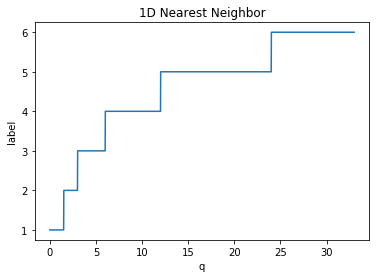

In [161]:
"""
References: Sam helped me a ton, attempted https://mmas.github.io/interpolation-scipy but couldn't get it to work 
with the numbers I wanted to use.
"""
#Function using train (x,y) and returns y for q based on 1 nearest neighbor
def interpolation_nn(train, q):
    #I played around with the number some and it didn't change so I just decided 50
    nearest_dist = 50
    for point in train:
        x = point[0]
        y = point[1]
        if abs(q - x) < nearest_dist:
            nearest_dist = abs(q-x)
            label = y
    return label

#This was mentioned in our Tuesday call I believe and there were some posts on it. 
#I saw some examples with linspace, but couldn't figure it out 
x = np.arange(0, 33, 0.01)
y = np.array([])
#Loop to update y array
for q in x:
    y = np.append(y, interpolation_nn(points, q))

#Plotting the data. I also saw in examples plotting the points, real values, and interpolation but again couldn't make it work    
plt.plot(x, y)
plt.xlabel('q')
plt.ylabel('label')
plt.title('1D Nearest Neighbor')
plt.show()

* (b) - The average of the labels of the two nearest neighbors

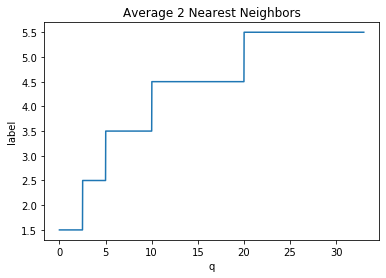

In [163]:
"""
Reference: Again got help from Sam. He broke it down enough for it to make sense 
"""
#Function similar to (a)
def interpolation_nn_2(train, q):
    distances = []
    for point in train:
        x = point[0]
        y = point[1]
        distances.append(abs(q-x))
    
    #Again played with distance numbers and it did not affect the outcome that I could see
    smallest = 100
    smallest_i = 0
    sec_smallest = 50
    sec_smallest_i = 0
    for i in range(len(distances)):
        if distances[i] < smallest:
            smallest = distances[i]
            smallest_i = i
    for i in range(len(distances)):
        if distances[i] < sec_smallest and i != smallest_i:
            sec_smallest = distances[i]
            sec_smallest_i = i
    
    #Getting the average of the 2 nearest neighbors        
    avg_of_labels = (train[smallest_i][1] + train[sec_smallest_i][1]) / 2
    return avg_of_labels

#Did the same as above using arnage instead of linspace
x = np.arange(0, 33, 0.01)
y = np.array([])
#Loop to update y array
for q in x:
    y = np.append(y, interpolation_nn_2(points, q))

#Plotting the interpolation line
plt.plot(x,y)
plt.xlabel('q')
plt.ylabel('label')
plt.title('Average 2 Nearest Neighbors')
plt.show()